In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path if necessary)
df = pd.read_csv("Churn_Modelling.csv",sep=',')

# Display the first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
# Filter customers who have not exited (Exited = 0)
df_0 = df[df['Exited'] == 0]

# Filter customers who have exited (Exited = 1)
df_1 = df[df['Exited'] == 1]

# Display the first few rows of each DataFrame to confirm
print("Customers who have not exited:")
print(df_0.head())

print(df_0.shape)

count = df['Exited'].value_counts()
print(count)

print("\nCustomers who have exited:")
print(df_1.head())
print(df_1.shape)

Customers who have not exited:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
1          2    15647311      Hill          608     Spain  Female   41   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
6          7    15592531  Bartlett          822    France    Male   50   
8          9    15792365        He          501    France    Male   44   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1       1   83807.86              1          0               1   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
6       7       0.00              2          1               1   
8       4  142051.07              2          0               1   

   EstimatedSalary  Exited  
1        112542.58       0  
3         93826.63       0  
4         79084.10       0  
6         1

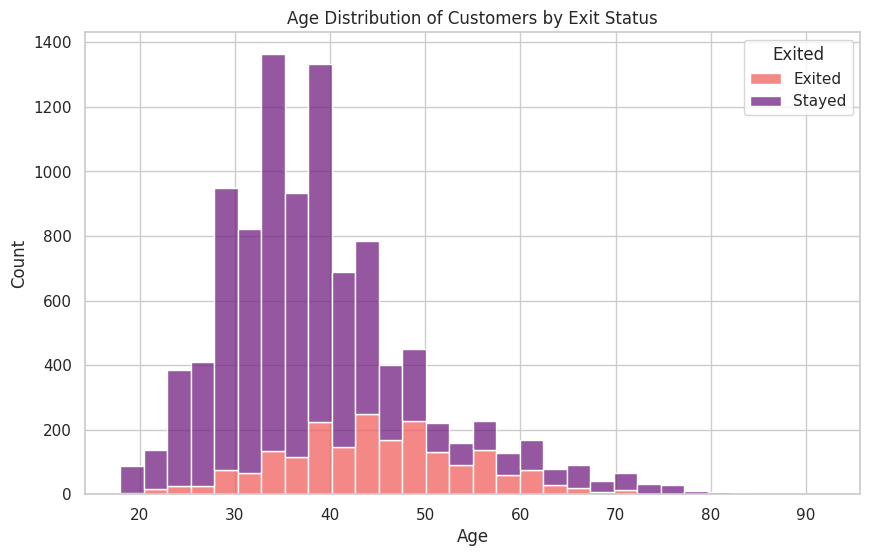

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis 1:Age
# Set the plot style
sns.set(style="whitegrid")

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', palette='magma', bins=30)

# Add titles and labels
plt.title('Age Distribution of Customers by Exit Status')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Exited', labels=['Exited', 'Stayed'])

# Show the plot
plt.show()

In [74]:
mean_age = df_0['Age'].mean()
std_age = df_0['Age'].std()

print(f"Mean Age: {mean_age:.2f}")
print(f"Standard Deviation of Age: {std_age:.2f}")

Mean Age: 37.41
Standard Deviation of Age: 10.13


In [75]:
mean_age = df_1['Age'].mean()
std_age = df_1['Age'].std()

print(f"Mean Age: {mean_age:.2f}")
print(f"Standard Deviation of Age: {std_age:.2f}")

Mean Age: 44.84
Standard Deviation of Age: 9.76


In [76]:
from scipy.stats import ttest_ind

# Separate the age data into two groups
ages_stayed = df_0['Age']
ages_left = df_1['Age']

# Perform an independent t-test
t_stat, p_value = ttest_ind(ages_stayed, ages_left)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -29.77
P-value: 0.0000


 P-value <0.05,the age difference is significant between the two groups (left and stayed)

In [77]:
import numpy as np

def bs_choice(data, func, size):
    # Initialize an array to store the bootstrap statistics
    bs_s = np.empty(size)

    for i in range(size):
        # Generate a bootstrap sample by random sampling with replacement
        bs_abc = np.random.choice(data, size=len(data), replace=True)

        # Apply the statistic function to the bootstrap sample
        bs_s[i] = func(bs_abc)

    return bs_s

In [96]:
import numpy as np



# Calculate means of both groups
mean_stayed = np.mean(ages_stayed)
mean_left = np.mean(ages_left)

# Calculate the difference in means
mean_diff = mean_left - mean_stayed
print(f"Difference in Means: {mean_diff:.2f}")

# Calculate overall mean
overall_mean = np.mean(np.concatenate([ages_stayed, ages_left]))

# Shift the data to the overall mean
ages_stayed_shifted = ages_stayed - mean_stayed + overall_mean
ages_left_shifted = ages_left - mean_left + overall_mean

print("Shifted Ages (Stayed):", ages_stayed_shifted)
print("Shifted Ages (Left):", ages_left_shifted)

Difference in Means: 7.43
Shifted Ages (Stayed): 1       42.513411
3       40.513411
4       44.513411
6       51.513411
8       45.513411
          ...    
9993    29.513411
9994    30.513411
9995    40.513411
9996    36.513411
9999    29.513411
Name: Age, Length: 7963, dtype: float64
Shifted Ages (Left): 0       36.083803
2       36.083803
5       38.083803
7       23.083803
16      52.083803
          ...    
9981    36.083803
9982    40.083803
9991    47.083803
9997    30.083803
9998    36.083803
Name: Age, Length: 2037, dtype: float64


In [97]:
import numpy as np

# Fonction de bootstrap pour calculer l'écart-type
def bootstrap_std(data, n_bootstrap=1000):
    bootstrapped_stds = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stds[i] = np.std(sample)
    return bootstrapped_stds

# Supposons que ces deux listes contiennent les âges
# ages_stayed = [...]
# ages_left = [...]

# Bootstrap sampling pour chaque groupe
std_stayed = bootstrap_std(ages_stayed)
std_left = bootstrap_std(ages_left)

# Calcul de la différence entre les écarts-types bootstrapés
std_diff = std_stayed - std_left

# Résultats
print("Standard Deviation (Stayed) - Mean:", np.mean(std_stayed))
print("Standard Deviation (Left) - Mean:", np.mean(std_left))
print("Mean Difference in Standard Deviation:", np.mean(std_diff))

Standard Deviation (Stayed) - Mean: 10.121293891487921
Standard Deviation (Left) - Mean: 9.747944735745227
Mean Difference in Standard Deviation: 0.37334915574269323


In [98]:
obs_diff = np.mean(ages_stayed) - np.mean(ages_left)


In [99]:
bootstrap_diffs = []
for _ in range(1000):
    sample_stayed = np.random.choice(ages_stayed, size=len(ages_stayed), replace=True)
    sample_left = np.random.choice(ages_left, size=len(ages_left), replace=True)
    diff = np.mean(sample_stayed) - np.mean(sample_left)
    bootstrap_diffs.append(diff)

In [100]:
p_value = np.sum(np.abs(bootstrap_diffs) >= np.abs(obs_diff)) / len(bootstrap_diffs)
print(f"P-value: {p_value}")

P-value: 0.495


A p-value significantly >0.05, meaning that the Bootstrap method clearly shows that there is no significant difference in age between the 2 groups (stayed and left).

Hypothesis 2: Credit Score

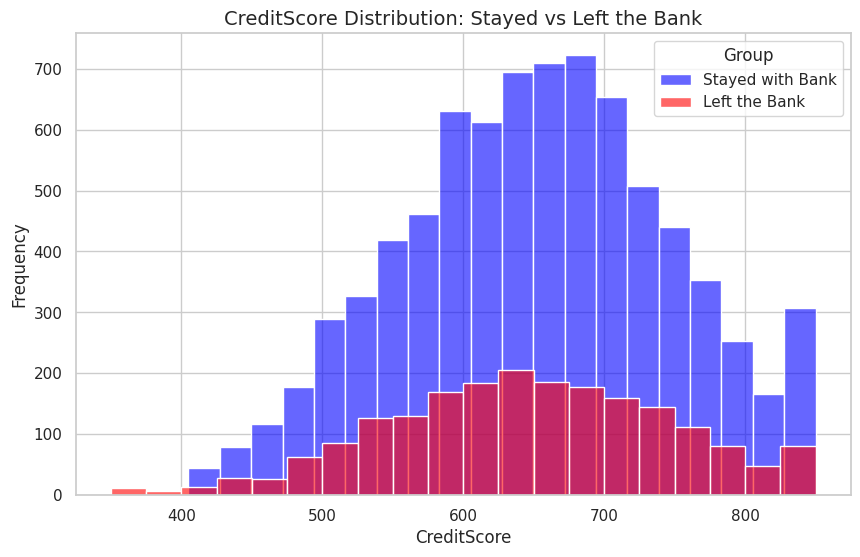

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_0' is for customers who stayed and 'df_1' is for customers who left
# Replace 'CreditScore' with the actual column name if different

plt.figure(figsize=(10, 6))

# Plot histogram for customers who stayed with the bank
sns.histplot(df_0['CreditScore'], bins=20, kde=False, color='blue', label='Stayed with Bank', alpha=0.6)

# Plot histogram for customers who left the bank
sns.histplot(df_1['CreditScore'], bins=20, kde=False, color='red', label='Left the Bank', alpha=0.6)

# Add labels and title
plt.title('CreditScore Distribution: Stayed vs Left the Bank', fontsize=14)
plt.xlabel('CreditScore', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Group')

# Show plot
plt.show()

In [102]:
from scipy import stats

# Perform the independent t-test between CreditScore of customers who stayed and customers who left
t_stat, p_value = stats.ttest_ind(df_0['CreditScore'], df_1['CreditScore'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 2.7100778888729833
P-value: 0.006738213892192373


A p-value <0.05,  so we reject the Null hypothesis and there is therefore a significant difference in terms of Creditscore between the 2 groups (stayed and left).

Hypothesis 3:Balance

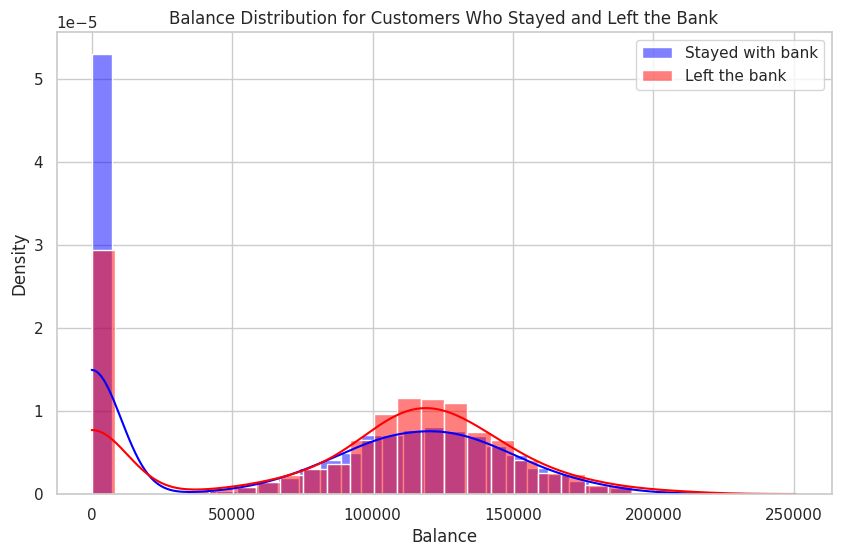

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'Balance' for customers who stayed and customers who left
plt.figure(figsize=(10, 6))
sns.histplot(df_0['Balance'], kde=True, color='blue', label='Stayed with bank', stat='density', bins=30)
sns.histplot(df_1['Balance'], kde=True, color='red', label='Left the bank', stat='density', bins=30)

# Add labels and legend
plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Balance Distribution for Customers Who Stayed and Left the Bank')
plt.legend()

plt.show()

In [104]:
from scipy import stats

# Perform a t-test to compare the 'Balance' between the two groups
t_stat, p_value = stats.ttest_ind(df_0['Balance'], df_1['Balance'])

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -11.936240300013841
P-value: 1.2755633191525477e-32


A p-value significantly <0.05, there is therefore a significant difference in terms of Balance between the 2 groups (stayed and left).

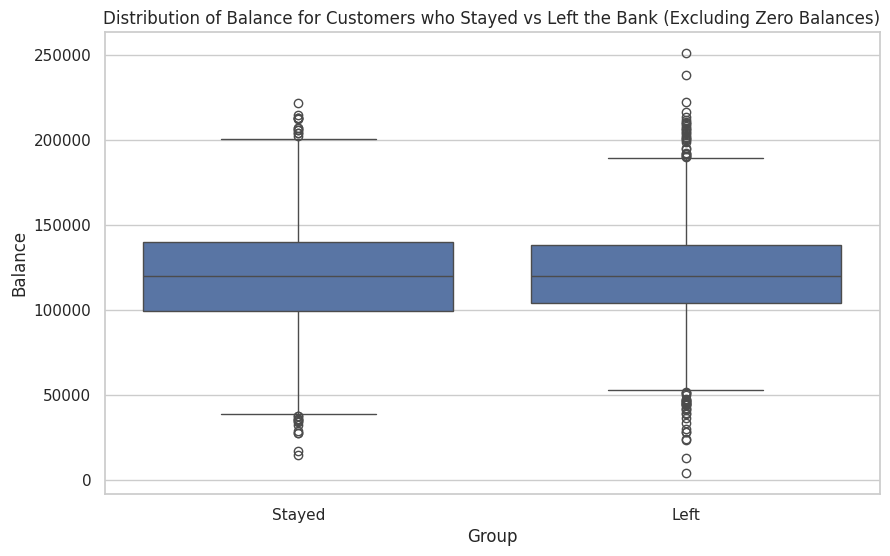

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out zero balances for both groups
df_0_non_zero = df_0[df_0['Balance'] > 0]
df_1_non_zero = df_1[df_1['Balance'] > 0]

# Combine both groups into a new DataFrame for plotting
df_combined = pd.concat([df_0_non_zero[['Balance']], df_1_non_zero[['Balance']]],
                         keys=['Stayed', 'Left'], names=['Group']).reset_index()

# Plot the distribution of Balance for both groups using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Balance', data=df_combined)
plt.title("Distribution of Balance for Customers who Stayed vs Left the Bank (Excluding Zero Balances)")
plt.xlabel("Group")
plt.ylabel("Balance")
plt.show()

Once the balance=0 is excluded, we see that the distribution of values ​​in terms of balance is not significantly different between the two groups.

In [106]:
from scipy.stats import ttest_ind

# Filter out zero balances for both groups
df_0_non_zero = df_0[df_0['Balance'] > 0]
df_1_non_zero = df_1[df_1['Balance'] > 0]

# Perform the t-test to compare the Balance between the two groups
t_stat, p_value = ttest_ind(df_0_non_zero['Balance'], df_1_non_zero['Balance'])

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.374781881782122
P-value: 0.16924734893322796


The t-test confirms what we saw in the visualization just above, the p-value is significantly >0.05, the Null hypothesis isn't rejected so there is no difference in terms of balance level between the 2 groups once the balance value=0 is filtered.

Hypothesis 4: Estimated Salary

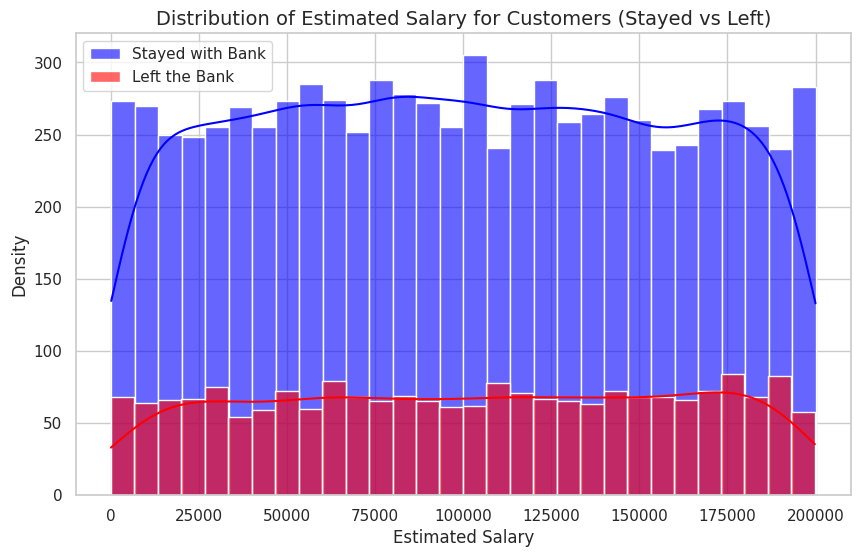

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of EstimatedSalary for both groups
plt.figure(figsize=(10, 6))

# Distribution for customers who stayed with the bank
sns.histplot(df_0['EstimatedSalary'], kde=True, color='blue', label='Stayed with Bank', bins=30, alpha=0.6)

# Distribution for customers who left the bank
sns.histplot(df_1['EstimatedSalary'], kde=True, color='red', label='Left the Bank', bins=30, alpha=0.6)

# Titles and labels
plt.title('Distribution of Estimated Salary for Customers (Stayed vs Left)', fontsize=14)
plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

Visually, there is not much difference in terms of salary between the two groups.

In [109]:
from scipy.stats import ttest_ind

# Perform the independent t-test
t_stat, p_value = ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'])

# Display the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -1.2097
P-value: 0.2264


P-value>0.05 so there is no significant difference in terms of estimated salary between the 2 groups.

In [92]:
import numpy as np

# Calculate means for each group
mean_stayed = df_0['EstimatedSalary'].mean()
mean_left = df_1['EstimatedSalary'].mean()

# Calculate the observed difference in means
mean_diff = mean_stayed - mean_left
print(f"Difference in Means: {mean_diff:.4f}")

# Calculate the overall mean of EstimatedSalary
overall_mean = np.mean([mean_stayed, mean_left])
print(f"Overall Mean: {overall_mean:.4f}")

# Shift the salaries to the overall mean for each group
df_0_shifted = df_0['EstimatedSalary'] - mean_stayed + overall_mean
df_1_shifted = df_1['EstimatedSalary'] - mean_left + overall_mean

# Display the first few shifted values for verification
print("\nShifted EstimatedSalary (Stayed Group):")
print(df_0_shifted.head())

print("\nShifted EstimatedSalary (Left Group):")
print(df_1_shifted.head())

Difference in Means: -1727.2858
Overall Mean: 100602.0347

Shifted EstimatedSalary (Stayed Group):
1    113406.222879
3     94690.272879
4     79947.742879
6     10926.442879
8     75804.142879
Name: EstimatedSalary, dtype: float64

Shifted EstimatedSalary (Left Group):
0     100485.237121
2     113067.927121
5     148893.067121
7     118483.237121
16      4234.027121
Name: EstimatedSalary, dtype: float64


In [117]:
import numpy as np

# Function to perform bootstrap sampling and calculate sample means
def bootstrap_mean(data, n_bootstrap=1000):
    return np.array([
        np.mean(np.random.choice(data, size=len(data), replace=True))
        for _ in range(n_bootstrap)
    ])

# Perform bootstrap sampling for both groups
bootstrap_means_stayed = bootstrap_mean(df_0['EstimatedSalary'])
bootstrap_means_left = bootstrap_mean(df_1['EstimatedSalary'])

# Calculate the differences in bootstrap sample means
bootstrap_mean_diff = bootstrap_means_stayed - bootstrap_means_left

# Display the results
print(f"Bootstrap Mean (Stayed): {np.mean(bootstrap_means_stayed):.4f}")
print(f"Bootstrap Mean (Left): {np.mean(bootstrap_means_left):.4f}")
print(f"Mean Difference (Bootstrap): {np.mean(bootstrap_mean_diff):.4f}")

Bootstrap Mean (Stayed): 99741.2211
Bootstrap Mean (Left): 101518.6918
Mean Difference (Bootstrap): -1777.4707


In [116]:
obs_diff = np.mean(df_0['EstimatedSalary']) - np.mean(df_1['EstimatedSalary'])

In [118]:
p_value = np.sum(np.abs(bootstrap_mean_diff) >= np.abs(obs_diff)) / len(bootstrap_mean_diff)
print(f"P-value: {p_value}")

P-value: 0.524


P-value is significantly >0.05, so we do not reject the null hypothesis and therefore the Bootstrap method clearly highlights that there is no significant difference in terms of estimated salary between the 2 groups.

Final conclusion:

Without the Bootstrap method, it was observed that variables such as age and Credit Score had an influence on customer unsubscription with their bank. The Bootstrap method allows us to refine the analyses and highlight that it is only the Credit Score variable that has an influence on customer unsubscription with their bank.

The Balance level has a significant impact depending on whether or not we filter the Balance=0 level. Taking this filtering into account, there is no difference between the 2 groups and therefore no influence on unsubscription. If we do not take into account the Balance=0 filtering, there is a significant difference between the 2 groups (stayed and left). And with or without Bootstrap, we do not detect a significant difference in terms of estimated salary between the 2 groups and therefore this variable does not exert an influence on the unsubscription of customers with their bank.